<a href="https://colab.research.google.com/github/lm934/Case-Study-Rental-Bike-Data-Analysis/blob/main/Rental_Bike_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rental Bike Data Analysis**


This project involves analyzing a dataset containing rental bike details to gain insights into various factors influencing bike rentals. The dataset includes information such as datetime, season, holiday, working day, weather, temperature, humidity, wind speed, and rental counts. The analysis focuses on understanding the relationships between different variables and rental counts.

**Objective**

The objectives of this project are to:

1.   Analyze the relationship between working days and rental counts.
2.   Analyze the relationship between seasons and rental counts.
3.   Analyze the relationship between weather conditions and rental counts.
4.   Analyze the relationship between holidays and rental counts.
5.   Derive meaningful insights from the dataset.

In [ ]:
# Importing python libraries
import numpy as np
import pandas as pd
# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset**

In [ ]:
#reading the dataset
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

In [ ]:

df.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
# Inspecting the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#showing the columns in the dataset
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
#showing the shape of the dataset (total number of rows, total number of columns)
df.shape

(10886, 12)

In [ ]:
#summary of descriptive statistics for numerical columns in the DataFrame
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#summary of descriptive statistics for categorical columns in the DataFrame
df.describe(include=object)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
# checking the datatypes
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
#missing value checking
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

 *The result indicates that there are no null values present in the dataset given.*


**Updating the Season Column**

In [ ]:
df["season"] = df["season"].apply(lambda x: "spring" if x == 1 else ("summer" if x == 2 else ("fall" if x == 3 else "winter")))

In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


**Value counts and Unique attributes **

In [ ]:
df["season"].value_counts()
df["season"].value_counts(normalize=True)*100

season
winter    25.114826
summer    25.105640
fall      25.105640
spring    24.673893
Name: proportion, dtype: float64

In [ ]:
df["weather"].value_counts()
df["weather"].value_counts(normalize=True)*100

weather
1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: proportion, dtype: float64

In [ ]:
df["workingday"].value_counts(normalize=True)*100

workingday
1    68.087452
0    31.912548
Name: proportion, dtype: float64

In [ ]:
df["holiday"].value_counts(normalize=True)*100

holiday
0    97.14312
1     2.85688
Name: proportion, dtype: float64

In [ ]:
df["registered"].value_counts()

registered
3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: count, Length: 731, dtype: int64

In [ ]:
df["casual"].value_counts()

casual
0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: count, Length: 309, dtype: int64

In [ ]:
df["registered"].value_counts()

registered
3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: count, Length: 731, dtype: int64

Univariate Analysis


**1. Countplot: **  
The categorical variables like season,weather, working day are plotted using countplot to understand their distribution in the dataset.

<Axes: title={'center': 'Distribution of the data by Workingday'}, xlabel='workingday', ylabel='count'>

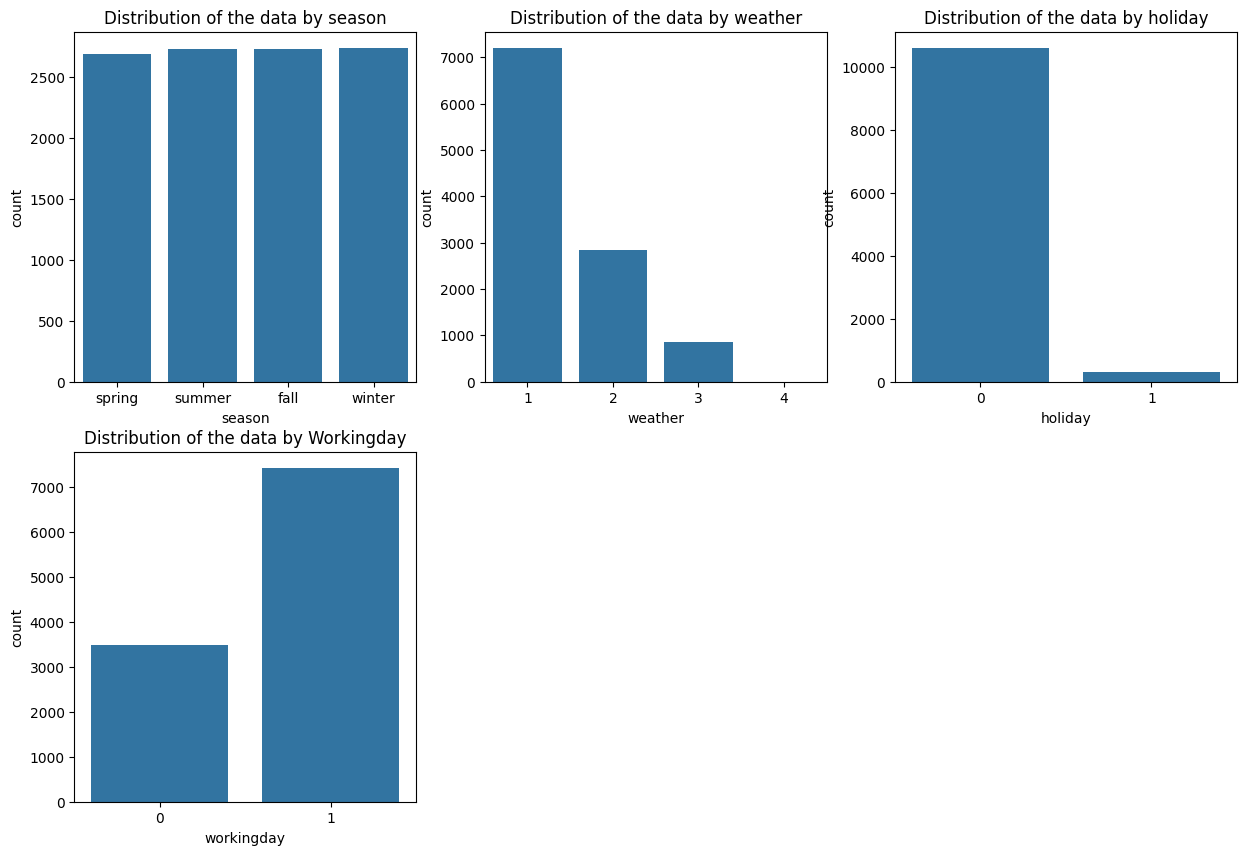

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title("Distribution of the data by season")
sns.countplot(x ="season", data=df)
plt.subplot(2,3,2)
plt.title("Distribution of the data by weather")
sns.countplot(x="weather", data=df)
plt.subplot(2,3,3)
plt.title("Distribution of the data by holiday")
sns.countplot(x="holiday", data=df)
plt.subplot(2,3,4)
plt.title("Distribution of the data by Workingday")
sns.countplot(x="workingday", data=df)

**2. Histogram: **
The continuous variables like temperature, feelis-like temperature, humidity, windspeed are ploted using histplot to understand their distribution and skewness in the dataset.

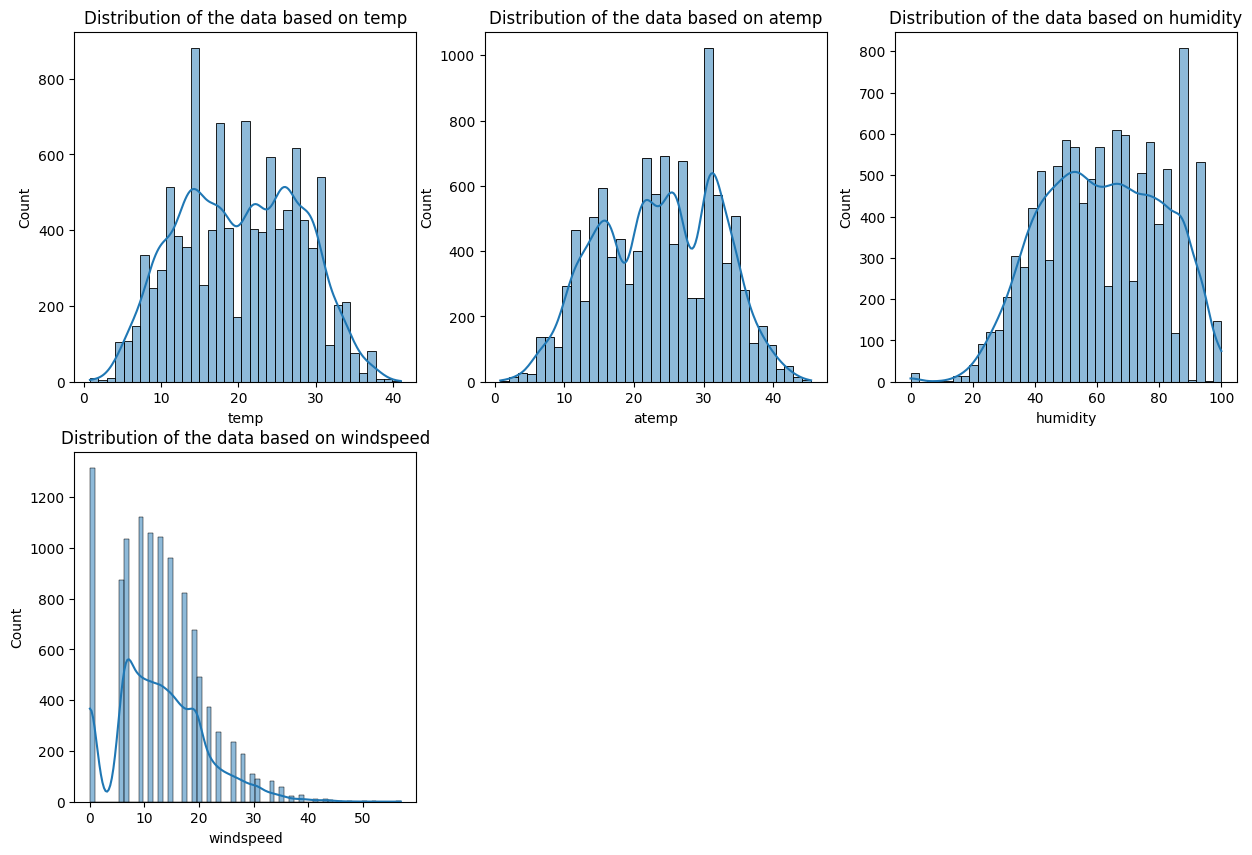

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Distribution of the data based on temp")
sns.histplot(x="temp", kde=True, data=df)

plt.subplot(2, 3, 2)
plt.title("Distribution of the data based on atemp")
sns.histplot(x="atemp", kde=True, data=df)

plt.subplot(2, 3, 3)
plt.title("Distribution of the data based on humidity")
sns.histplot(x="humidity", kde=True, data=df)

plt.subplot(2, 3, 4)
plt.title("Distribution of the data based on windspeed")
sns.histplot(x="windspeed", kde=True, data=df)

plt.show()

**Bivariate Analysis** (Relationships between important variables such as workingday and count, season and count, weather and count.

**1. LinePlot:**
The count of casual rental bike users, registered rental bike users and total number of rental bike users are a discrete variable in the dataset and it is best plot them using a linechart to display the count over time period.

In [ ]:
#create a new column "hour" by extracting the hour component from the datetime column
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
#create bins&labels to categorize the hours into different timeslots
bins = [0,4,9,16,21,23]
labels = ["Dawn","Early Morning", "Afternoon", "Late Evening", "Night"]
df["Timeslot"] = pd.cut(df["hour"], labels=labels, bins=bins)

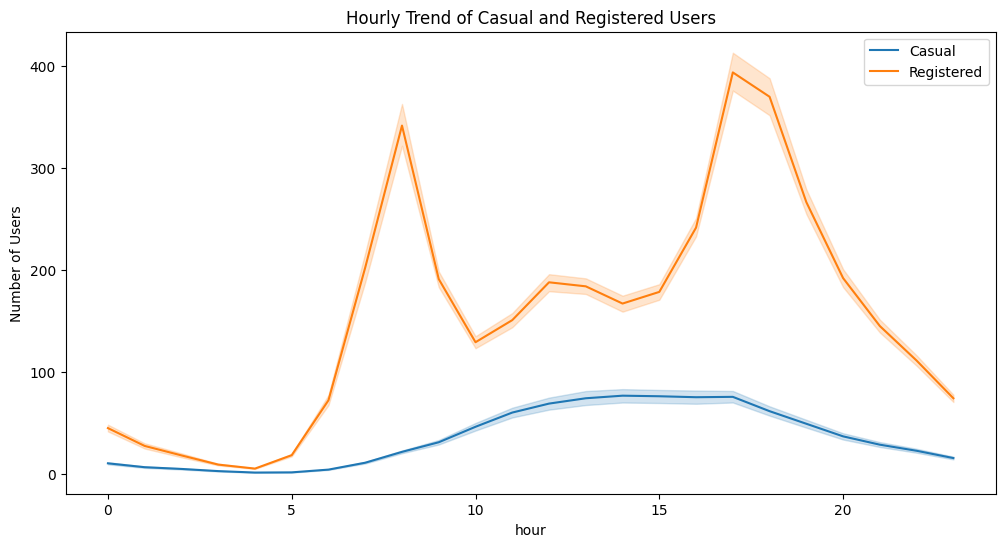

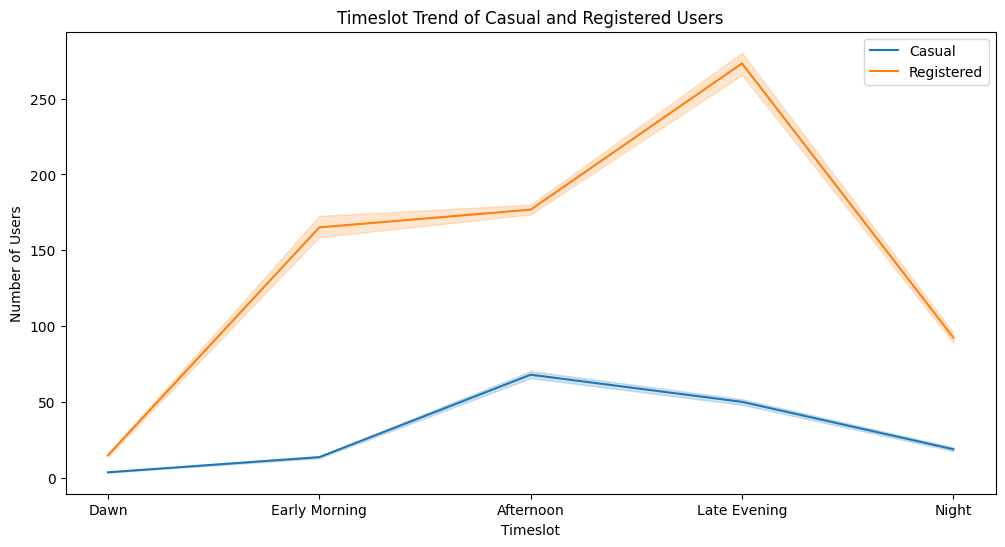

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='hour', y='casual', label='Casual')
sns.lineplot(data=df, x='hour', y='registered', label='Registered')
plt.xlabel('hour')
plt.ylabel('Number of Users')
plt.title('Hourly Trend of Casual and Registered Users')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Timeslot', y='casual', label='Casual')
sns.lineplot(data=df, x='Timeslot', y='registered', label='Registered')
plt.xlabel('Timeslot')
plt.ylabel('Number of Users')
plt.title('Timeslot Trend of Casual and Registered Users')

plt.legend()
plt.show()


The line plot illustrates that the count of registered rental bike users consistently exceeds that of casual rental bike users throughout the day. Notably, registered users show a prominent surge in rental activity during the early morning hours, with usage peaking in the late evening. However, rental counts taper off significantly during the night.

Conversely, casual users predominantly rent bikes during the morning to early afternoon period, with rental counts gradually declining as the day progresses. The graph indicates a notable decrease in casual rental activity as the afternoon progresses.

This analysis suggests distinct usage patterns between registered and casual users, with registered users exhibiting a more sustained and consistent demand throughout the day, while casual users tend to utilize bike rentals primarily during specific time windows.

**2. Barplots:**

Here I used stacked bar plots for the analysis of **'workingday vs. count'**, **'season vs. count'**, **'weather vs. count'**, and **'holiday vs. count'**

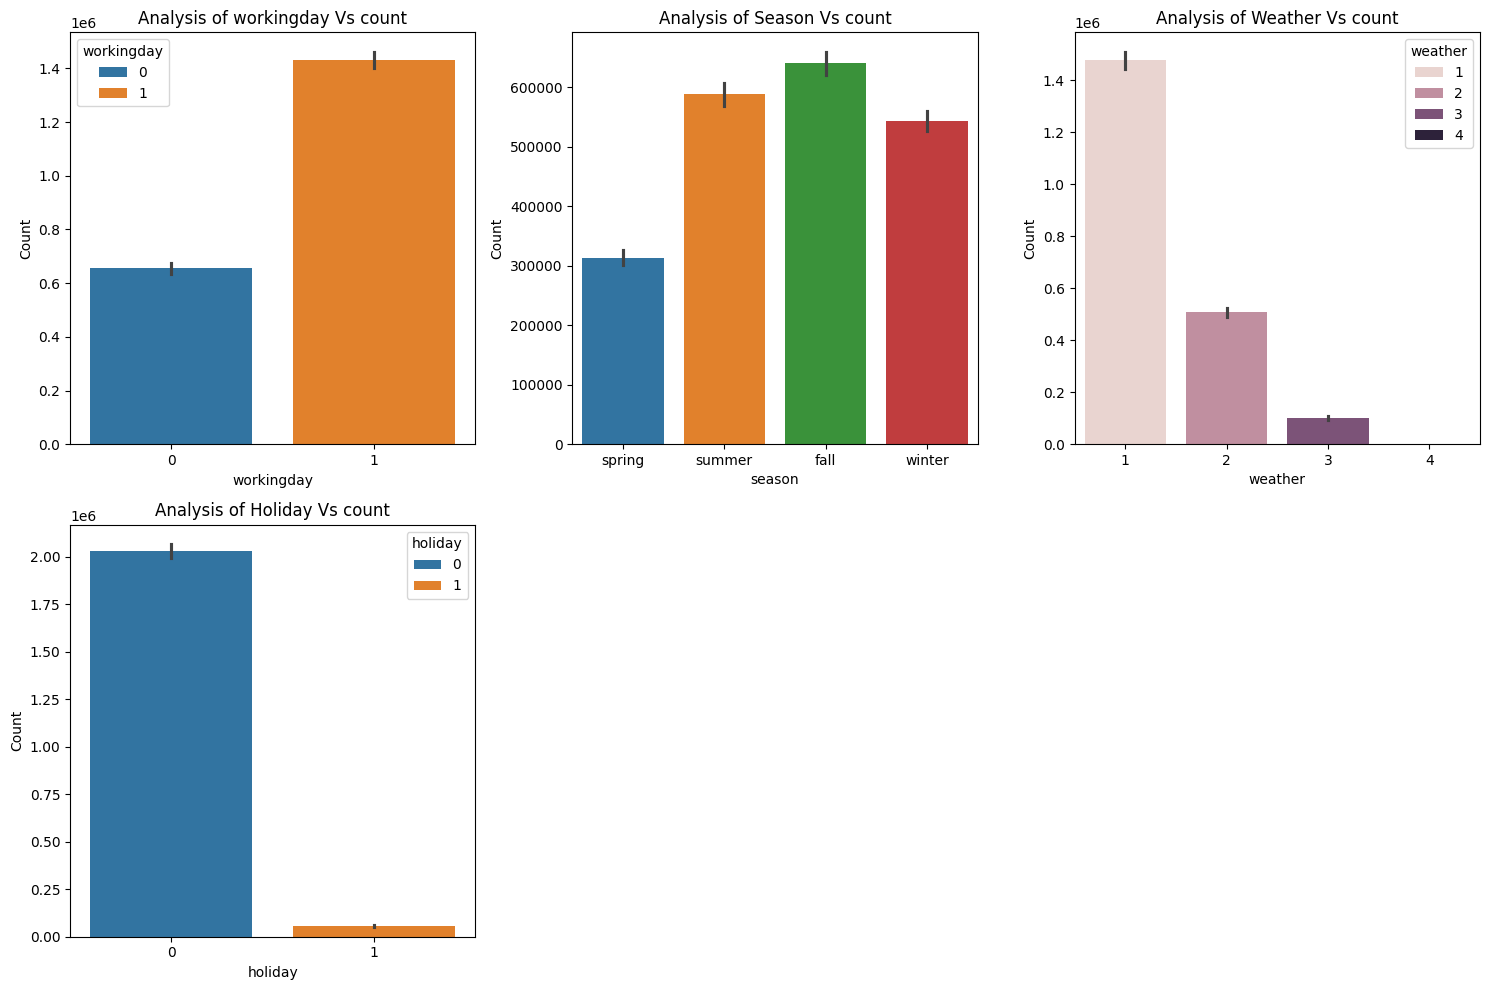

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Analysis of workingday Vs count")
sns.barplot(x="workingday", y="count", hue="workingday", data=df, estimator=sum)
plt.ylabel("Count")

plt.subplot(2, 3, 2)
plt.title("Analysis of Season Vs count")
sns.barplot(x="season", y="count", hue="season", data=df, estimator=sum)
plt.ylabel("Count")

plt.subplot(2, 3, 3)
plt.title("Analysis of Weather Vs count")
sns.barplot(x="weather", y="count", hue="weather", data=df, estimator=sum)
plt.ylabel("Count")

plt.subplot(2, 3, 4)
plt.title("Analysis of Holiday Vs count")
sns.barplot(x="holiday", y="count", hue="holiday", data=df, estimator=sum)
plt.ylabel("Count")

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

The above analysis of the relationship between the independent variables ("workingday", "season", "weather", "holiday") and the dependent variable ("count") based on the bar plots are;

**Analysis of Workingday vs Count:**
There is a slight increase in the number of people using rental bikes on normal working days or weekdays compared to weekends or holidays. This suggests that the rental bike usage might be influenced by whether it's a working day or not.

**Analysis of Season vs Count:**
The count of rental bikes differs according to each season.
The highest count is observed in "fall", followed by summer and winter, with the least number of rental bikes in spring.
Seasonality seems to have a significant impact on rental bike usage, with more people likely to rent bikes during certain seasons.

**Analysis of Weather vs Count:**
The peak number of bike rentals is observed when the weather is clear or with few clouds ("weather" code 1).
The least count is observed when the weather involves light snow or rain, thunderstorms, and scattered clouds ("weather" code 3).
Interestingly, there is an increase in rental bike counts even during weather conditions involving mist or fog ("weather" code 2) and heavier precipitation ("weather" code 4). This suggests that factors other than just clear weather might also influence bike rental usage, such as commuting needs or recreational activities.

**Analysis of Holiday vs Count:**
Analysis of Holiday vs Count: There is a huge increase in the number of people using rental bikes on holidays to non-holidays. This suggests that the rental bike usage might be influenced by whether it's a holiday or not.

**Comments on outliers of various attributes**

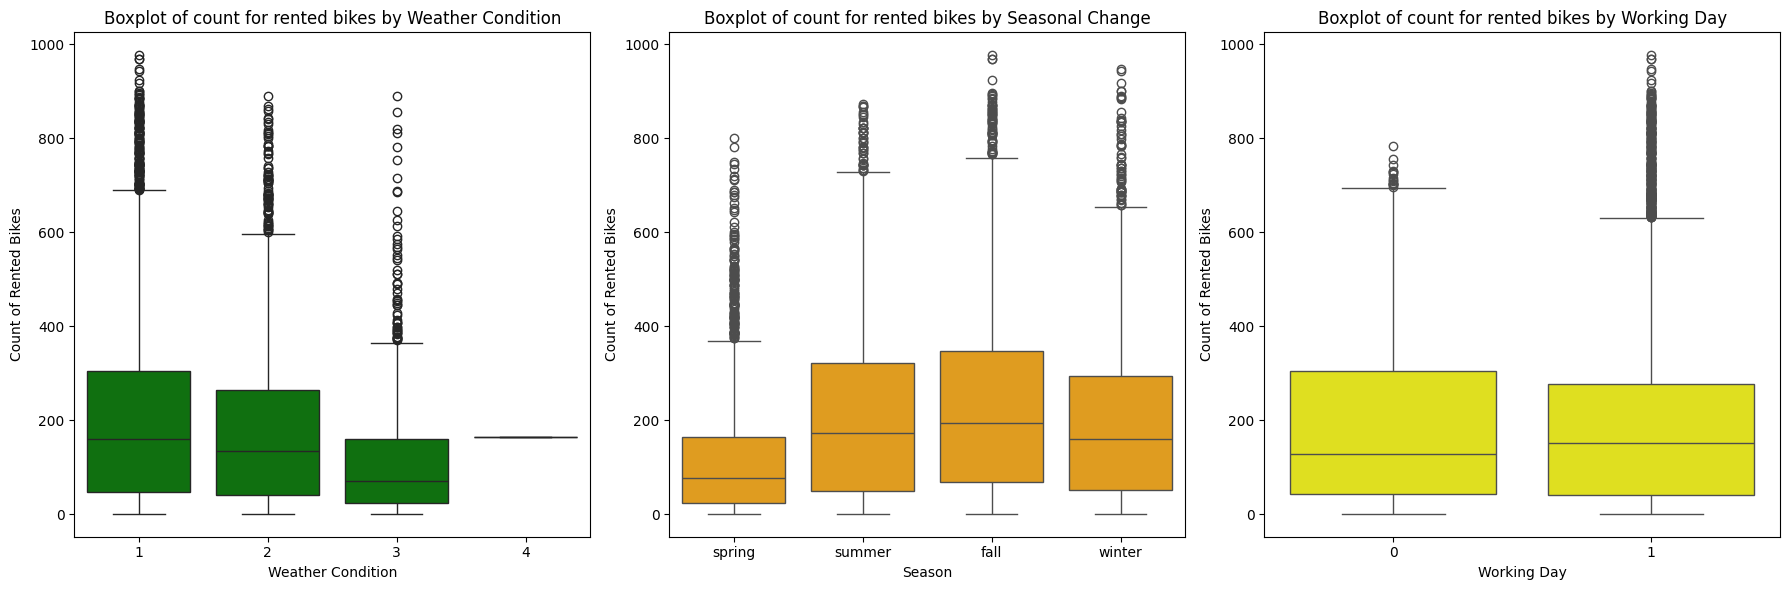

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x="weather", y="count", data=df, color="green")
plt.title("Boxplot of count for rented bikes by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Count of Rented Bikes")

plt.subplot(1, 3, 2)
sns.boxplot(x="season", y="count", data=df, color="orange")
plt.title("Boxplot of count for rented bikes by Seasonal Change")
plt.xlabel("Season")
plt.ylabel("Count of Rented Bikes")

plt.subplot(1, 3, 3)
sns.boxplot(x="workingday", y="count", data=df, color="yellow")
plt.title("Boxplot of count for rented bikes by Working Day")
plt.xlabel("Working Day")
plt.ylabel("Count of Rented Bikes")

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

Outlier Treatment Using IQR Method and Creating boxplot with outlier-treated data

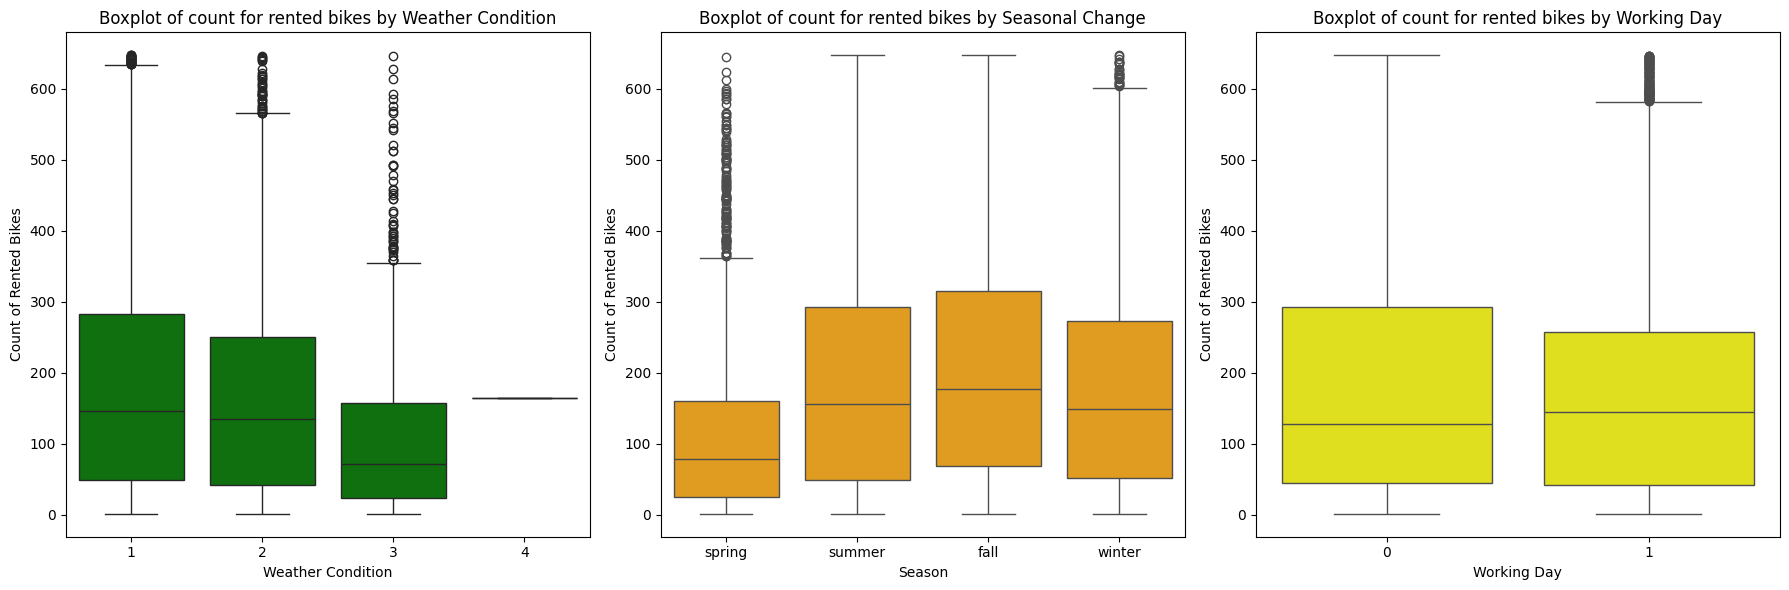

In [ ]:
# Calculate the IQR for the 'count' column
Q1 = df["count"].quantile(0.25)
Q3 = df["count"].quantile(0.75)
IQR = Q3-Q1
# Define the lower and upper bounds for outliers
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR
upper_limit, lower_limit
# Replace outliers with the median
df['count_no_outliers'] = df['count'].apply(lambda x: x if (x >= lower_limit and x <= upper_limit) else df['count'].median())


# Create boxplot with outlier-treated data
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x="weather", y="count_no_outliers", data=df, color="green")
plt.title("Boxplot of count for rented bikes by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Count of Rented Bikes")

plt.subplot(1, 3, 2)
sns.boxplot(x="season", y="count_no_outliers", data=df, color="orange")
plt.title("Boxplot of count for rented bikes by Seasonal Change")
plt.xlabel("Season")
plt.ylabel("Count of Rented Bikes")

plt.subplot(1, 3, 3)
sns.boxplot(x="workingday", y="count_no_outliers", data=df, color="yellow")
plt.title("Boxplot of count for rented bikes by Working Day")
plt.xlabel("Working Day")
plt.ylabel("Count of Rented Bikes")

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

Here I have used boxplot to understand the outliers for each variable;

1. Boxplots for count of rented bikes by weather condition:
The boxplots reveal insights into the distribution of rented bike counts across different weather conditions. Across all three weather categories (1, 2, and 3), the lowest count begins at 0, with the 25th percentile hovering just below 50. The median count is approximately 150 for weather conditions 1 and 2, while it's around 100 for weather condition 3. As for the 75th percentile, it exceeds 250 for weather condition 1, slightly dips for condition 2, and falls below 200 for condition 3. Notably, the upper whiskers extend beyond 700 for condition 1, close to 600 for condition 2, and around 400 for condition 3, indicating the presence of numerous outliers. In contrast, weather condition 4 displays a uniform distribution centered around 200, with no outliers detected.
2. Boxplots for count of rented bikes by season:
Analyzing the rented bike counts across different seasons reveals consistency in the lowest count, which is consistently at 0 across all seasons. The 25th percentile, median, and 75th percentile exhibit similar ranges across summer, fall, and winter, with slight variations observed in spring. All three seasons display a substantial number of outliers exceeding 700, particularly prominent in spring, where outliers extend beyond 380.
3. Boxplots for count of rented bikes by working day:
Comparison between working and non-working days elucidates similar ranges across both categories. The lowest count remains at 0 for both records, while the 25th percentile hovers around 50. Median counts fall within the range of 150, with the 75th percentile approximately at 300. Upper limits extend to around 700 for both working and non-working days, with numerous outliers detected above this threshold in both cases.

**Insights based on Boxplots:**

Weather Conditions:

a) Weather conditions 1 and 2 tend to have higher median counts of rented bikes compared to condition 3.
b) There is greater variability in rented bike counts during weather conditions 1 and 2, as indicated by the wider interquartile range.
c) Outliers are more prevalent in weather conditions 1 and 2, suggesting the occurrence of extreme rental demands during certain weather patterns.
d) Weather condition 4 shows a more uniform distribution of rented bike counts, with no significant outliers. This may indicate consistent rental demand regardless of weather variations.

Seasons:

a) Spring season appears to have the highest variability in rented bike counts, with numerous outliers exceeding the upper threshold.
b) Despite variations in median counts, all seasons exhibit a substantial number of outliers, indicating sporadic rental demands throughout the year.
c) Summer, fall, and winter seasons show relatively consistent median counts and interquartile ranges, suggesting stable rental patterns during these periods.

Working Days:

a) There is little difference in rented bike counts between working and non-working days, as indicated by similar median counts and interquartile ranges.
b) Both working and non-working days exhibit a considerable number of outliers, suggesting occasional surges in rental demand regardless of the day of the week.

**Hypothesis Testing**

1. Working Day has effect on number of electric cycles rented?

To visualize the effect of working day on the number of electric cycles rented, I created a bar plot comparing the mean rental counts for working days and non-working days

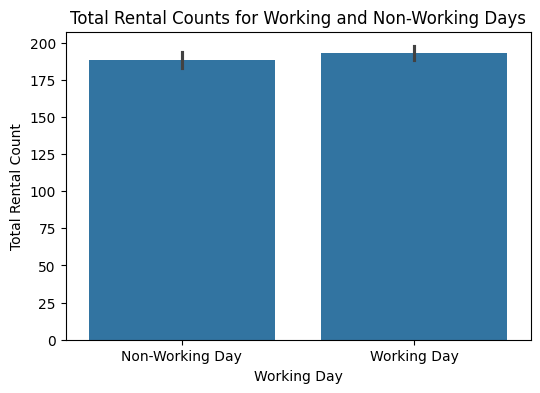

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x="workingday", y="count", data=df, estimator=np.mean)
plt.title("Total Rental Counts for Working and Non-Working Days")
plt.xlabel("Working Day")
plt.ylabel("Total Rental Count")
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])  # Customize x-axis labels
plt.show()

In [ ]:
#The null hypothesis (H0): there is no difference in the mean number of bikes rented between working days and non-working days.
#The alternative hypothesis (H1): there is a difference in the mean number of bikes rented between working days and non-working days.
from scipy.stats import ttest_ind
workingdays = df[df["workingday"]==1]["count"]
non_workingdays = df[df["workingday"]==0]["count"]
ttest_ind(workingdays, non_workingdays)

TtestResult(statistic=1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

"Upon analyzing the data, it's evident that the distribution is both normally distributed and right-skewed. Consequently, I proceeded with a hypothesis test using a t-test to understand if there exists a discrepancy in the number of bikes rented between working days and non-working days. The obtained p-value from the test is 0.22, and it is greater than the significance level of 0.05. Consequently, we fail to reject the null hypothesis. **Therefore, we conclude that there is no statistically significant difference in the mean number of bikes rented between working days and non-working days.**"

2. No. of cycles rented similar or different in different seasons

To understand more about the distribution across different season i have plotted them using boxplot aswell as barplot. Box plots provide a detailed view of the distribution, while bar plots offer a more straightforward comparison of mean or total counts.

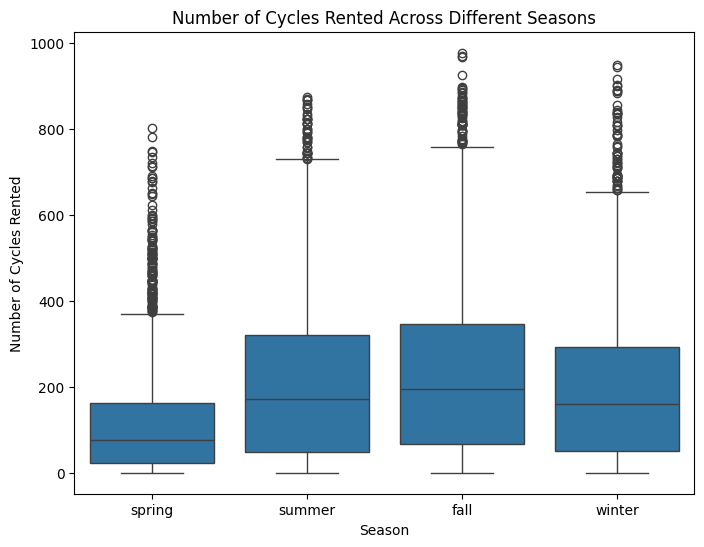

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="season", y="count", data=df)
plt.title("Number of Cycles Rented Across Different Seasons")
plt.xlabel("Season")
plt.ylabel("Number of Cycles Rented")
plt.show()

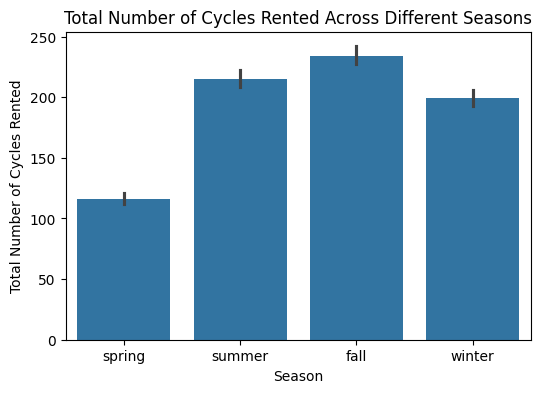

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x="season", y="count", data=df, estimator=np.mean)
plt.title("Total Number of Cycles Rented Across Different Seasons")
plt.xlabel("Season")
plt.ylabel("Total Number of Cycles Rented")
plt.show()

In [ ]:
#The null hypothesis (H0): The number of cycles rented is similiar in different season
#The alternative hypothesis (H1): The number of cycles rented is different in different season
from scipy.stats import f_oneway
spring_counts = df[df["season"]== "spring"]["count"]
summer_counts = df[df["season"]== "summer"]["count"]
fall_counts = df[df["season"]== "fall"]["count"]
winter_counts = df[df["season"]== "winter"]["count"]
f_oneway(spring_counts, summer_counts, fall_counts,winter_counts)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

As per the above oneway ANOVA test, the p_value is greater than the significant value 0.05 and we reject the null hypothesis, suggesting that there is significant difference in rental counts across seasons.

**Perform Assumptions of ANOVA test: QQplot, Shapiro, Levens test**

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import levene

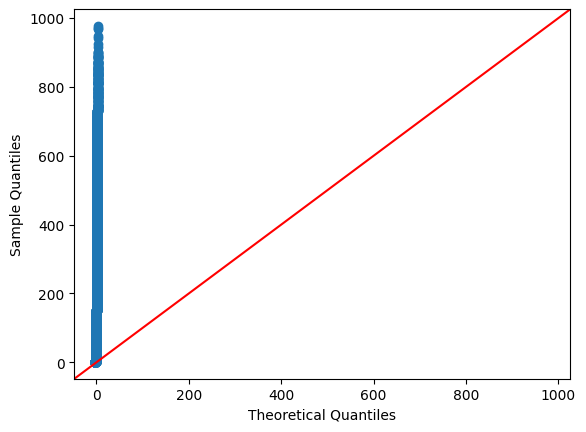

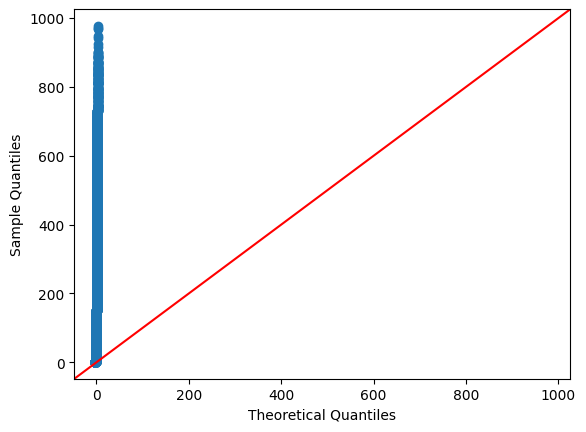

In [ ]:
#The null hypothesis (H0): The data is guassian
#The alternative hypothesis (H1): The data is not gaussian
qqplot(df["count"], line='45')

The observed upward direction of the QQ plot indicates a positively skewed distribution in our data. To delve deeper into the distribution characteristics, we can conduct additional statistical tests. For assessing normality, the Shapiro-Wilk test would be appropriate, while the Levene's test can help verify equality of variance across groups.

In [ ]:
#The null hypothesis (H0): The data is guassian
#The alternative hypothesis (H1): The data is not gaussian
shapiro(df["count"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8783695697784424, pvalue=0.0)

In [ ]:
#The null hypothesis (H0): The variances are equal
#The alternative hypothesis (H1): The variances are not equal
levene(spring_counts, summer_counts, fall_counts, winter_counts)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

Since the p-value is lesser than the significance level (0.05), we reject the null hypothesis. Thus, we conclude that the variances are not equal across the different season.

3. No. of cycles rented similar or different in different weather?

To visualize the comparison of the number of cycles rented across different weather conditions, I used plots such as box plots and bar plots. Both types of plots are suitable for comparing distributions or means of rental counts across multiple weather conditions.

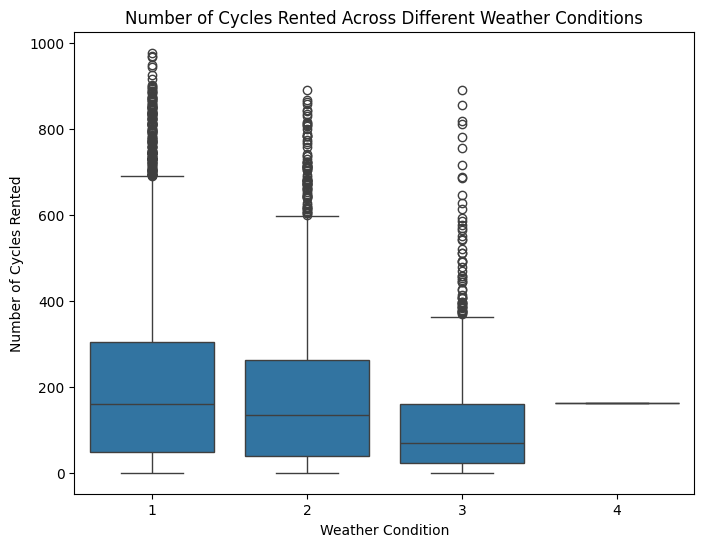

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="weather", y="count", data=df)
plt.title("Number of Cycles Rented Across Different Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Cycles Rented")
plt.show()

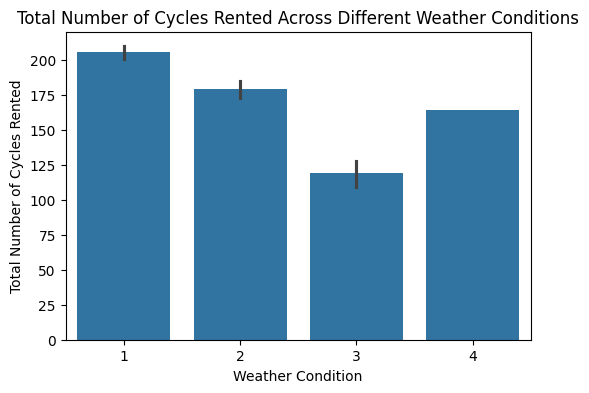

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x="weather", y="count", data=df, estimator=np.mean)
plt.title("Total Number of Cycles Rented Across Different Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Total Number of Cycles Rented")
plt.show()

In [ ]:
#The Null Hypothesis(H0): Number of cycles rented similar in different weather
#The Alternative Hypothesis(H1): Number of cycles rented different in different weather
weather1 = df[df["weather"]== 1]["count"]
weather2 = df[df["weather"]== 2]["count"]
weather3 = df[df["weather"]== 3]["count"]
weather4 = df[df["weather"]== 4]["count"]
f_oneway(weather1, weather2, weather3, weather4)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

Eventhough The visualization shows there is a difference in the number of rented bikes purchase on different weather we perform statistical test to confirm. But as per the oneway ANOVA test  the p-value is lesser than our chosen significance level(0.05), we reject the null hypothesis, suggesting that there is significant difference in rental counts across weather conditions.

In [ ]:
#The null hypothesis (H0): The variances are equal
#The alternative hypothesis (H1): The variances are not equal
levene(weather1, weather2, weather3, weather4)

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

Since the p-value is lesser than the significance level (0.05), we reject the null hypothesis. Thus, we conclude that the variances are not equal across the different weather.

4. Weather is dependent on season (check between 2 predictor variable)?

In [ ]:
#perform crosstab over weather and season
val = pd.crosstab(df["season"], df["weather"])
val

weather,1,2,3,4
season,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summer,1801,708,224,0
winter,1702,807,225,0


In [ ]:
#perform chi2contigency to understand the variables are dependent or independent of each other
#H0: There is no relationship between the two categorical variables / variables are independent
#H1: There is a relationship between the two categorical variables / variables are dependent
from scipy.stats import chi2_contingency
chi2_contingency(val)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

The P Value is lesser than the significance value so we reject the null hypothesis and it concludes that There is a relationship between the two categorical variables / variables are dependent

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

1.Temperature:
2.Humidity


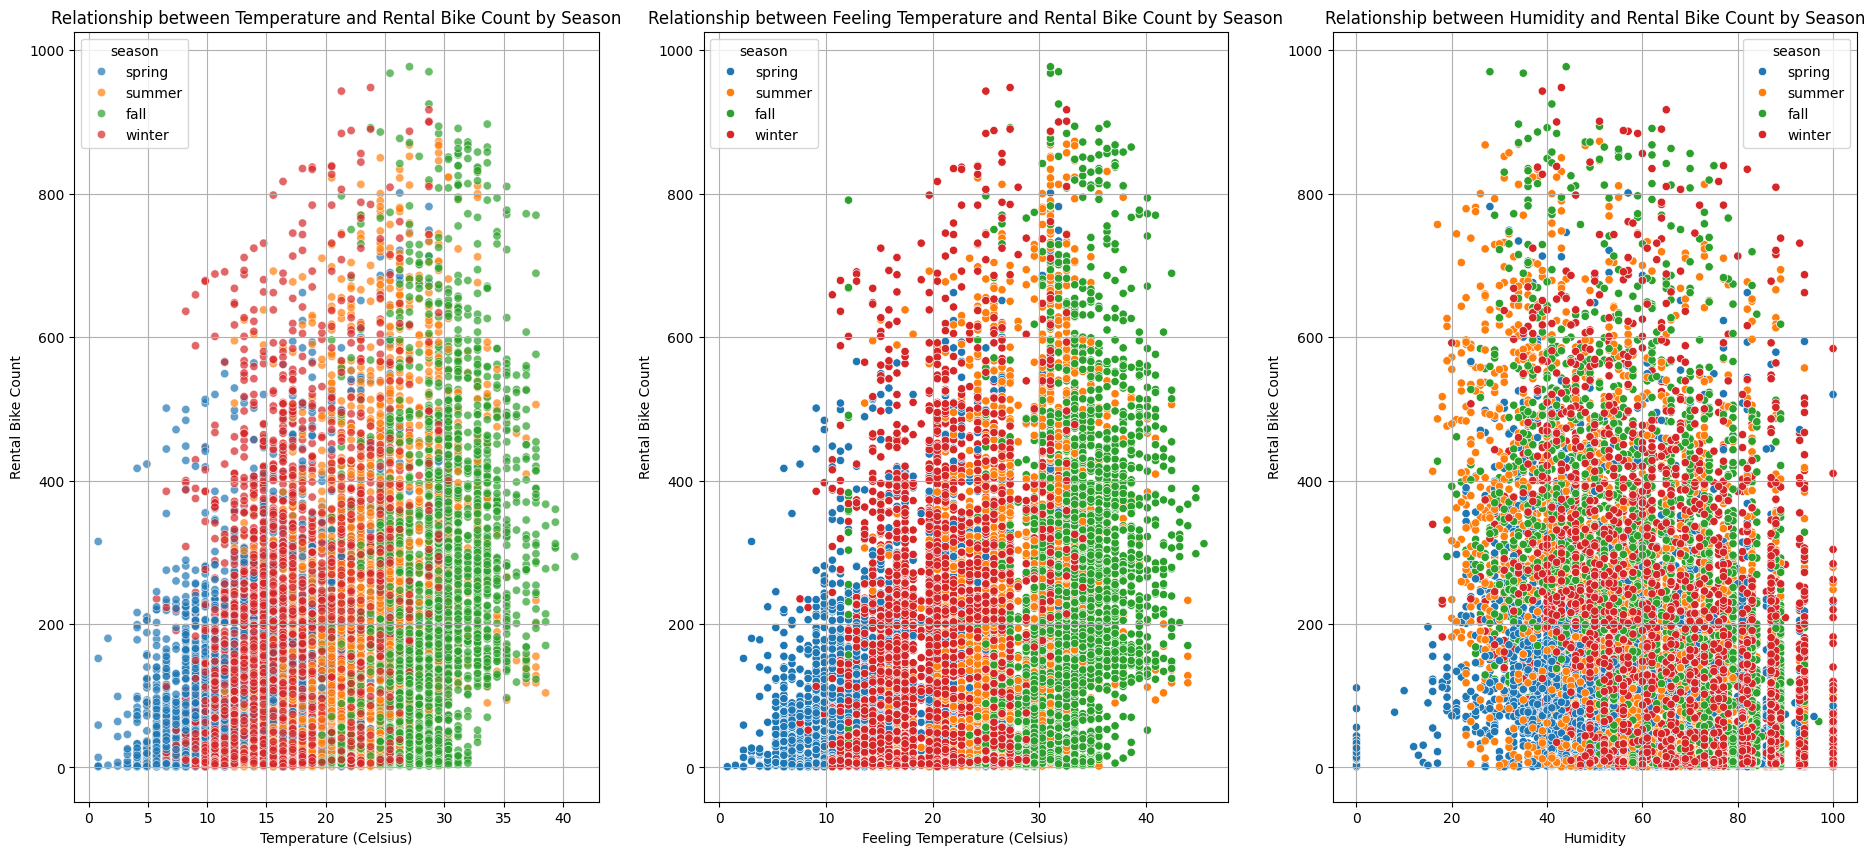

In [ ]:
plt.figure(figsize=(23, 10))

plt.subplot(1,3,1)
sns.scatterplot(x="temp", y="count", data=df, hue="season", alpha=0.7)
plt.title("Relationship between Temperature and Rental Bike Count by Season")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Rental Bike Count")
plt.grid(True)

plt.subplot(1,3,2)
sns.scatterplot(x="atemp", y="count", data=df, hue="season")
plt.title("Relationship between Feeling Temperature and Rental Bike Count by Season")
plt.xlabel("Feeling Temperature (Celsius)")
plt.ylabel("Rental Bike Count")
plt.grid(True)


plt.subplot(1,3,3)
sns.scatterplot(x="humidity", y="count", data=df, hue="season")
plt.title("Relationship between Humidity and Rental Bike Count by Season")
plt.xlabel("Humidity")
plt.ylabel("Rental Bike Count")
plt.grid(True)

plt.legend(title="season")
plt.show()


1. **Exploring the Relationship between Temperature and Rental Bike Count by Season:**

In our analysis, we utilized a scatterplot to delve into the connection between temperature and rental bike count across different seasons. The graph vividly illustrates the temperature ranges observed within each season and their corresponding impact on bike rental demand.

During the spring season, temperatures typically fall within the range of 0-30 degrees Celsius. Despite this, the rental bike count remains relatively modest, in the 0-10 degree range. It's evident that bike rental activity is not particularly high during spring compared to other seasons.

Transitioning to summer and winter, we observe a notable increase in bike rentals. Interestingly, during winter, the rental count peaks when temperatures hover around 20-25 degrees Celsius. Conversely, in summer, while temperatures soar to 35-40 degrees, there's a slight dip in bike rentals compared to the 20-30 degree range. This suggests that extreme temperatures may deter individuals from opting for bike rentals.

**The fall season** emerges as the peak period for bike rentals, with temperatures ranging from 20-25 degrees Celsius. However, there's a discernible decline in rental counts as temperatures exceed 35 degrees Celsius.

2. **Exploring the Relationship Between Feel-Like Temperature and Rental Bike Count Across Seasons:**

In our analysis, we employed a scatterplot to investigate the relationship between feel-like temperature and rental bike count across various seasons. The graph provides a clear depiction of the feel-like temperature ranges observed within each season and their respective impacts on bike rental demand.

Across all seasons, we observe a trend where higher feel-like temperatures coincide with decreased bike rental activity. Notably, **winter and fall emerge** as the peak seasons for bike rentals, with optimal temperatures ranging between 20-30 degrees Celsius. Conversely, during the summer season, characterized by extreme heat, there is a noticeable decline in bike rentals, reflecting a reluctance among individuals to engage in outdoor activities during such conditions.

3. **Analyzing the Impact of Humidity on Rental Bike Demand Across Seasons:**

Upon comparing the trends observed in the three graphs, it becomes evident that humidity levels play a significant role in influencing rental bike demand, particularly across different seasons. Notably, we observe distinct shifts in rental behavior in response to fluctuations in humidity levels.

During the spring and winter seasons, we observe a notable preference for rental bikes, particularly when humidity levels are exceptionally high, reaching 100. This trend contrasts with the behavior observed in the other two seasons, indicating a unique sensitivity to humidity during spring and winter.

Furthermore, the highest rental activity occurs when humidity levels fall within the range of 40-60. This suggests that moderate humidity levels are conducive to increased bike rental demand across all seasons, regardless of temperature variations.**The season fall** emerges as the peak season for bike rentals, with the highest rental counts occurring when humidity levels range between 30-45%. Following closely behind is the winter season, where rental activity remains robust within the same humidity range.


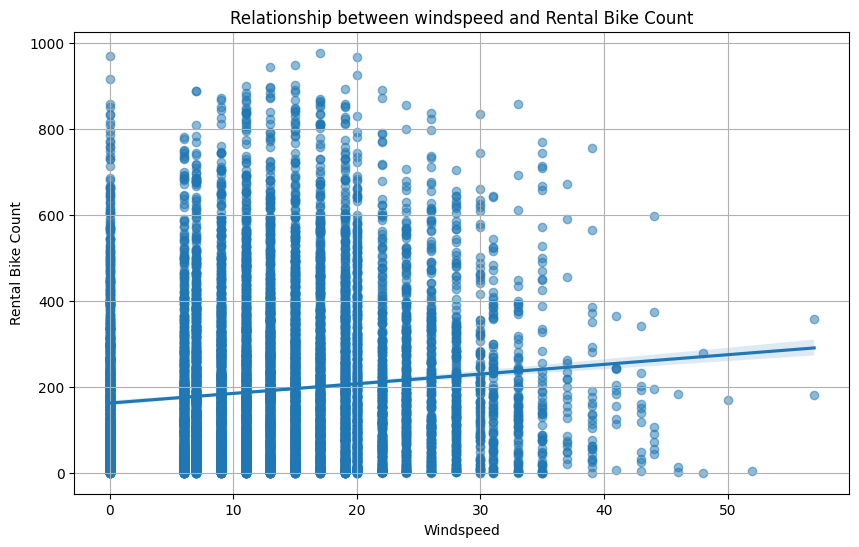

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x="windspeed", y="count", data=df, scatter_kws={"alpha":0.5})
plt.title("Relationship between windspeed and Rental Bike Count")
plt.xlabel("Windspeed")
plt.ylabel("Rental Bike Count")
plt.grid(True)
plt.show()

**Relationship between windspeed and renal bikes count using scatterplot**

I utilized a scatterplot to depict the correlation between windspeed and bike rental count. The data indicates that bike rentals are more frequent when windspeed is 0 or less than 20. However, there is a peak in rentals between windspeeds of 10 and 20. Beyond windspeeds of 40 to 50, there is a significant decline in bike rentals.







**Insights**

1. Environmental factors such as temperature, humidity, and windspeed significantly influence bike rental behavior, exhibiting distinct patterns across various seasons throughout the year.
2. The rental of bicycles is notably affected by working days, with increased rentals observed on weekdays compared to weekends or holidays.
3. Seasonal variations play a crucial role in rental counts, with preferences shifting across different seasons. For instance, during the spring season, there is a decline in bike rentals, whereas the fall season experiences higher rental counts.
4. Weather conditions also exert a significant impact on rental counts, indicating variations in rental behavior based on different weather conditions.

**Recommendations:**

1. Keep an Eye on the Weather:
Pay attention to the weather forecast. When the weather is nice, more people want to rent bikes. Try to offer special deals or promotions during sunny days to attract more customers.
2. Plan for Weekdays and Weekends:
Know that more people rent bikes during weekends than weekdays. Consider offering weekday discounts or promotions to encourage more rentals during slower times.
3. Adjust for the Seasons:
Understand that people rent bikes differently depending on the season. For example, fewer people rent bikes in spring, but more do in fall. Plan company's bike fleet and promotions accordingly.
4. Use Weather Info to company's Advantage:
Use weather predictions to plan ahead. If it's going to rain, maybe offer indoor activities instead of bike rentals. Being flexible based on the weather can help company serve customers better.